# Linear Regression

In [2]:
data <- read.csv('IceCreamData.csv')

In [3]:
head(data)

Temperature,Revenue
24.56688,534.7990
26.00519,625.1901
27.79055,660.6323
20.59534,487.7070
11.50350,316.2402
14.35251,367.9407


## Scatter Plot
Scatter plot is a graphical representation used to plot data points via the x-axis and y-axis. The main purpose of a scatter plot is to represent the relationship between the dependent and the independent variable or the correlation between them.

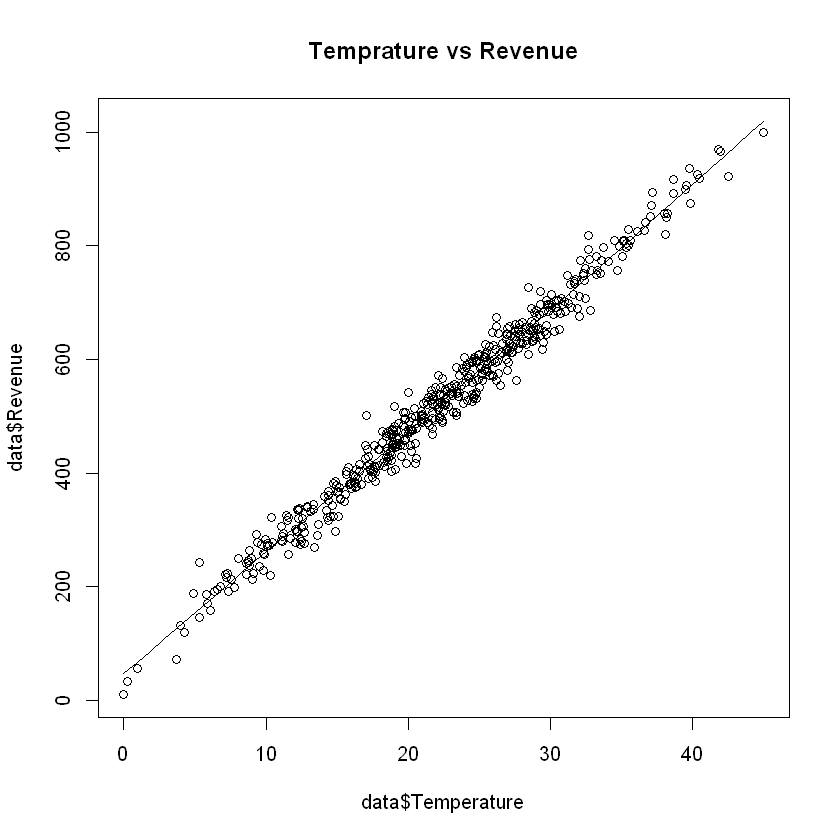

In [4]:
scatter.smooth(x = data$Temperature, y = data$Revenue, main="Temprature vs Revenue")

## Box Plot
A box plot is mainly used in explanatory data analysis. A box plot represents the distribution of the data and its variability. The box plot contains the upper and lower quartiles, so the box basically spans the Inter-Quartile Range (IQR).

One of the main reasons why box plots are used is to detect outliers in the data. Since the box plot spans the IQR, it detects the data points that lie outside this range. These data points are known as outliers.

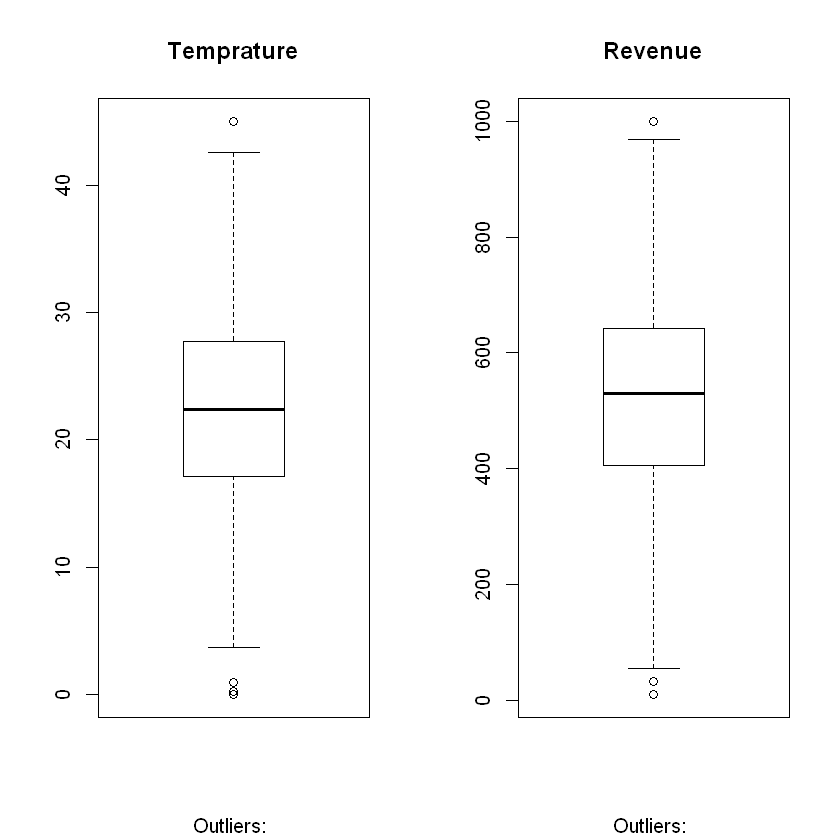

In [5]:
par(mfrow = c(1,2))
boxplot(data$Temperature,main='Temprature',sub=paste('Outliers:',boxplot.stats(data$x)$out))
boxplot(data$Revenue,main='Revenue',sub=paste('Outliers:',boxplot.stats(data$y)$out))

## Correlation
The next significant measurement in Linear regression is Correlation.

In [6]:
cor(data$Temperature,data$Revenue)

[1] 0.9898016

## Building The Regression Model 
What Is The lm() Function In R?
R comes with a predefined function for building a Linear Regression model. This function is known as the lm() function.

In [8]:
regressor = lm(Revenue ~ Temperature,data = data)

In [9]:
regressor


Call:
lm(formula = Revenue ~ Temperature, data = data)

Coefficients:
(Intercept)  Temperature  
      44.83        21.44  


Our next step is to check the efficiency of our model. We need to recognize whether this model is statistically strong enough to make predictions

In [10]:
summary(regressor)


Call:
lm(formula = Revenue ~ Temperature, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.303 -15.596  -0.167  16.811  91.294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.8313     3.2718    13.7   <2e-16 ***
Temperature  21.4436     0.1383   155.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.01 on 498 degrees of freedom
Multiple R-squared:  0.9797,	Adjusted R-squared:  0.9797 
F-statistic: 2.404e+04 on 1 and 498 DF,  p-value: < 2.2e-16


* Call: Is the function call to the linear regression model
* Residuals: This measure is used to check the efficiency of the model by calculating the difference between the actual values and the predicted values. Ideally, the sum of the residuals is approximately zero or as low as possible. However, in real-world problems this is not the case, residuals are always expected
* Coefficients: Represent the beta coefficients and their statistical significance.

p-value indicates how strong your regression model is. p-value is a very important measurement when it comes to ensuring the significance of the model. A linear model is said to be statistically significant only when both the p-Values are less than the pre-determined statistical significance level, which is ideally 0.05. The p-value for each coefficient is represented as a probability Pr(>|t|).

F-Statistic
The F-statistic is a statistical measure used to judge whether at least one independent variable has a non-zero coefficient. A high F-statistic value leads to a statistically accepted p-value (i.e., p < 0.05).

#### R-Squared And Adjusted R-Squared
R-squared is a statistical measure that represents the extent to which the predictor variables (X) explain the variation of the response variable (Y). For example, if R-square is 0.7, this shows that 70% of the variation in the response variable is explained by the predictor variables. Therefore, the higher the R squared, the more significant is the predictor variable.

In [11]:
test <- read.csv('test.csv')

In [13]:
regressor = lm(Revenue ~ Temperature,data = test)

In [14]:
y_pred = predict(regressor,newdata = test)

In [15]:
summary(regressor)


Call:
lm(formula = Revenue ~ Temperature, data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.274 -18.178   2.453  18.743  90.696 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.6915     9.8136   4.554 2.89e-05 ***
Temperature  21.4869     0.4125  52.088  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.39 on 56 degrees of freedom
Multiple R-squared:  0.9798,	Adjusted R-squared:  0.9794 
F-statistic:  2713 on 1 and 56 DF,  p-value: < 2.2e-16


# Calculate prediction accuracy

The accuracy can be tested by comparing the actual values and the predicted values.

In [16]:
actuals_preds <- data.frame(cbind(actuals=test$Revenue,predicted = y_pred))

In [17]:
correlation_accuracy <- cor(actuals_preds)

In [18]:
head(correlation_accuracy)

,actuals,predicted
actuals,1.0000000,0.9898371
predicted,0.9898371,1.0000000


# Linear Regression

the hypothesis we have is that car mileage differs between automatic and manual transmission cars
 Also factors like car weight and engine horsepower might influence the mielage variable

In [19]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [20]:
cars <- mtcars

In [21]:
str(cars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


### Descriptive analysis of variables
 Further create a box plot and a histogram to understand the spread of data for weight, mileage variables

In [22]:
par(mfrow=c(2,2))

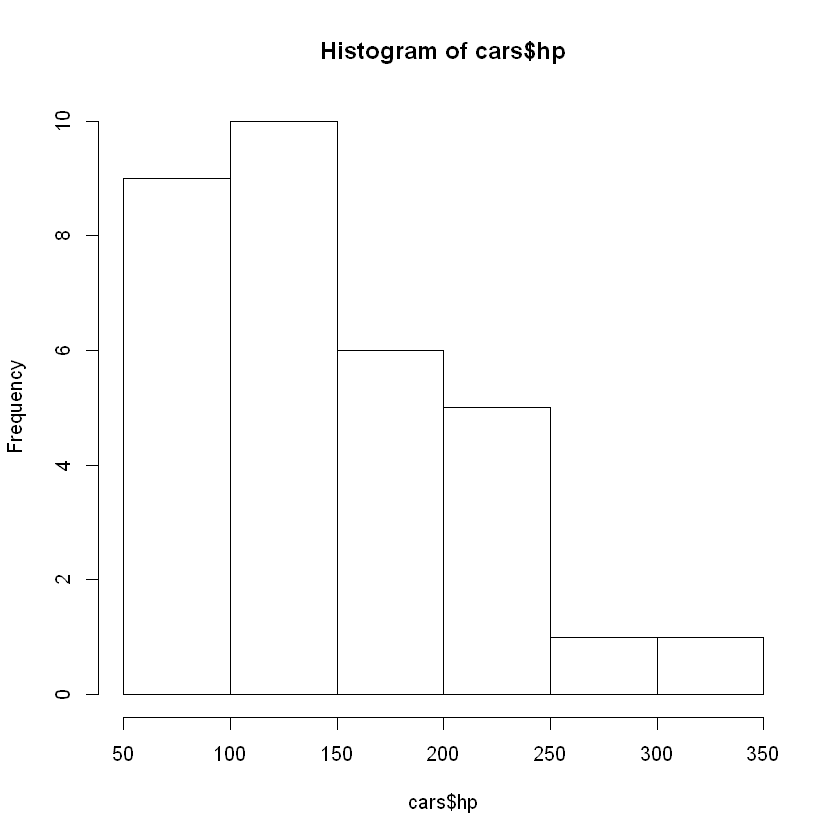

In [23]:
hist(cars$hp)

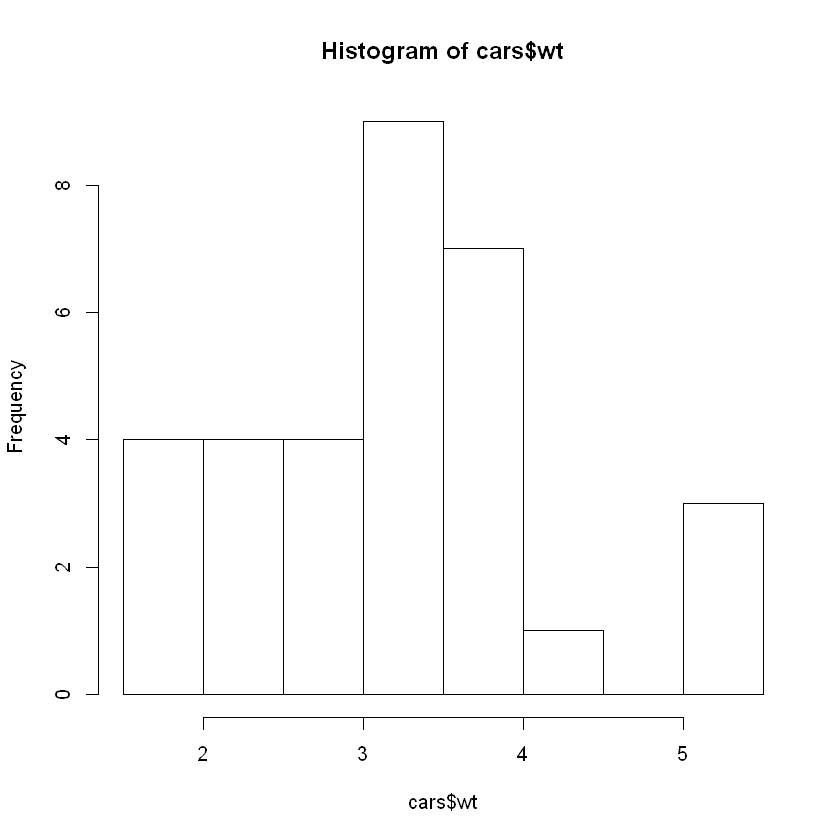

In [24]:
hist(cars$wt)

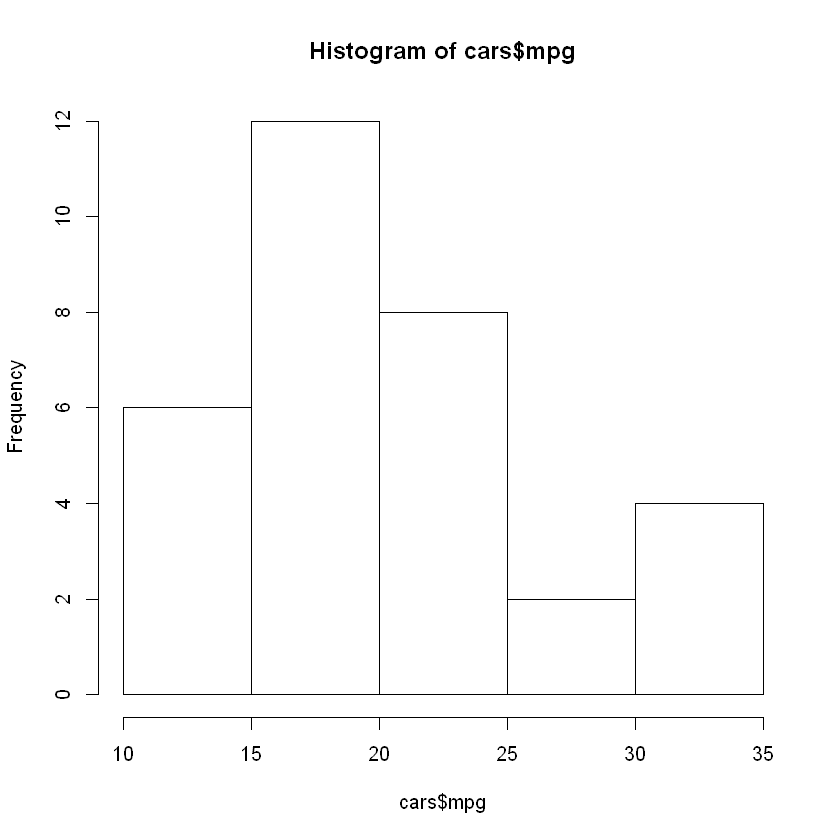

In [25]:
hist(cars$mpg)

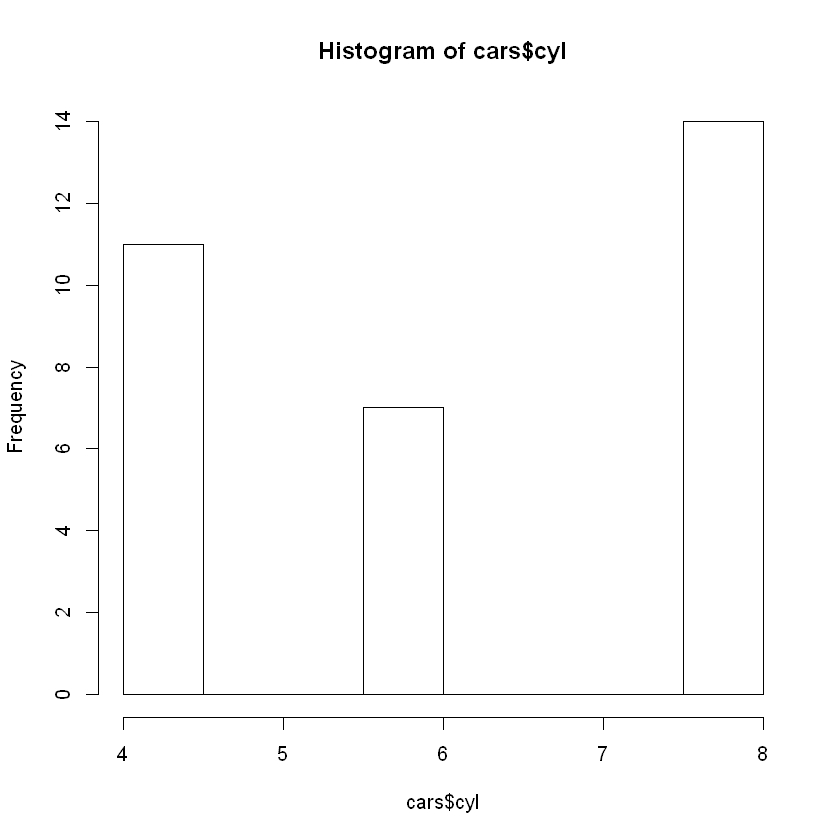

In [26]:
hist(cars$cyl)

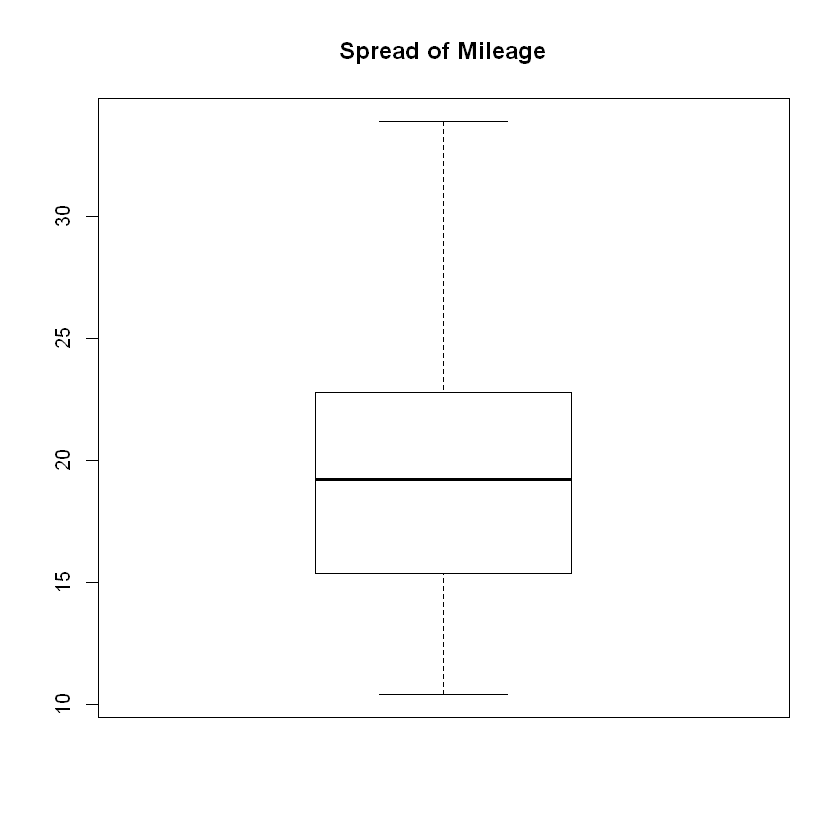

In [27]:
boxplot(cars$mpg,main="Spread of Mileage")

### Trying to understand the relationship between variables

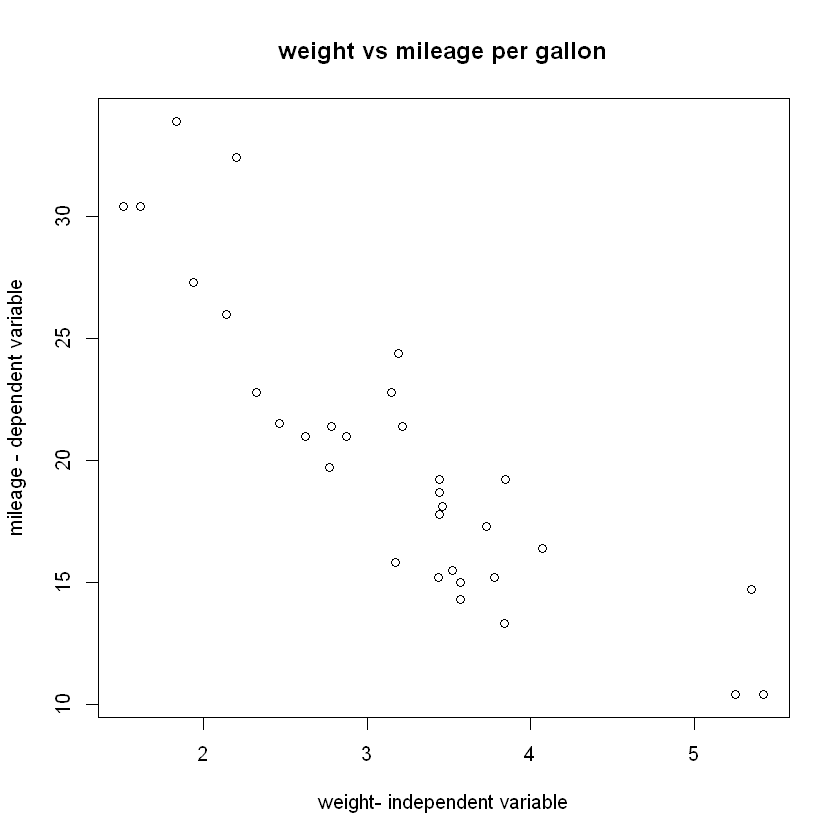

In [28]:
plot(cars$wt,cars$mpg,xlab="weight- independent variable",ylab="mileage - dependent variable",main="weight vs mileage per gallon")

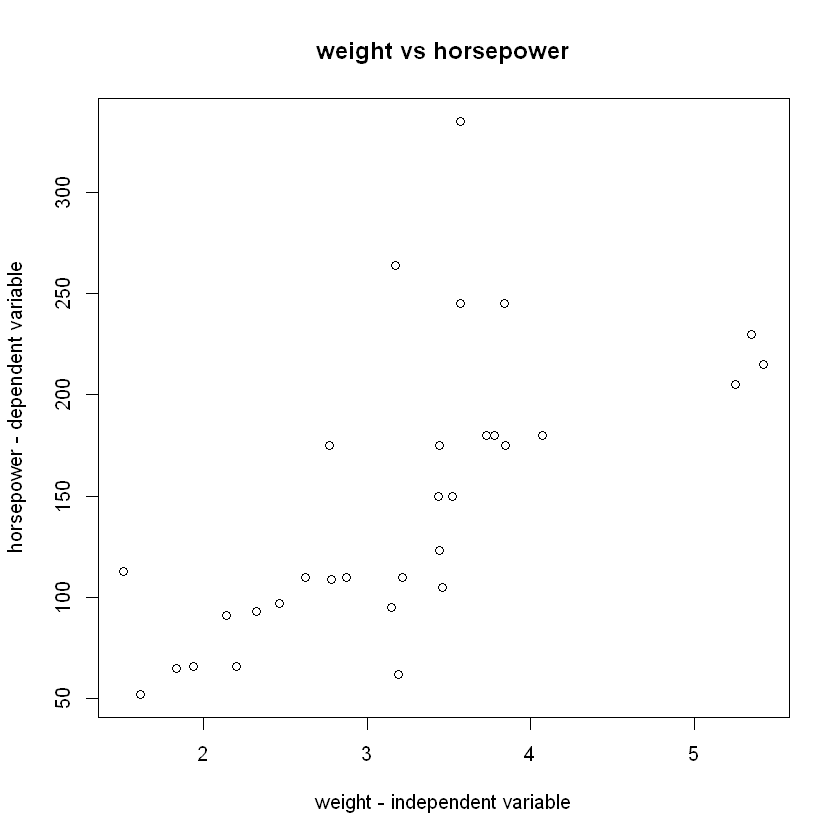

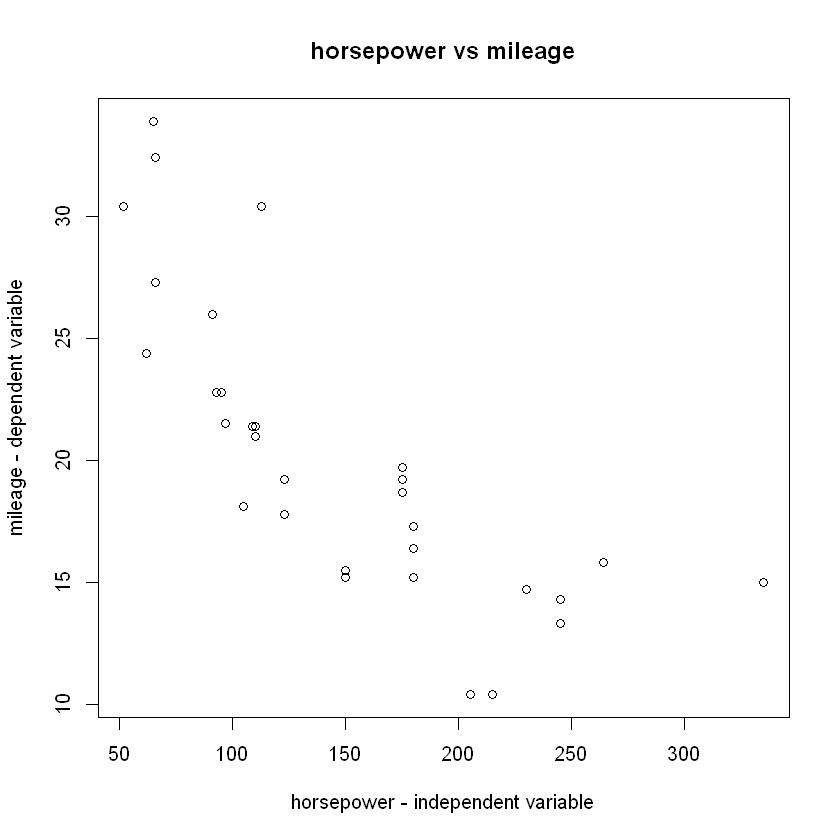

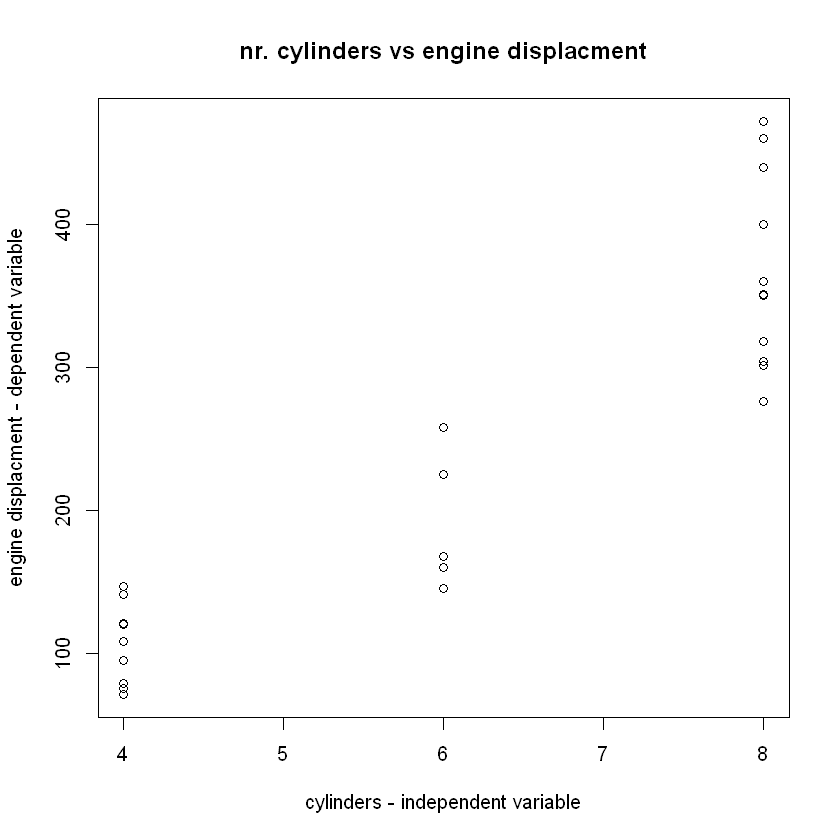

In [29]:
plot(cars$wt, cars$hp, xlab = "weight - independent variable", ylab = "horsepower - dependent variable", main = "weight vs horsepower")
plot(cars$hp, cars$mpg, xlab = "horsepower - independent variable", ylab = "mileage - dependent variable", main = "horsepower vs mileage")
plot(cars$cyl, cars$disp, xlab = "cylinders - independent variable", ylab = "engine displacment - dependent variable", main = "nr. cylinders vs engine displacment")

In [30]:
cor(cars$wt, cars$mpg) # indicates a negative linear relationship
cor(cars$hp, cars$disp) # indicates a positive linear relationsip
cor(cars$wt, cars$drat)
cor(cars$drat, cars$mpg)

[1] -0.8676594

[1] 0.7909486

[1] -0.7124406

[1] 0.6811719

# Applying linear regression model to predict car mileage

lets convert nominal numerical data into factors

In [31]:
cars$am <- as.factor(cars$am)
levels(cars$am) <- c("Auto-Transmission", "Manual-Transmission")

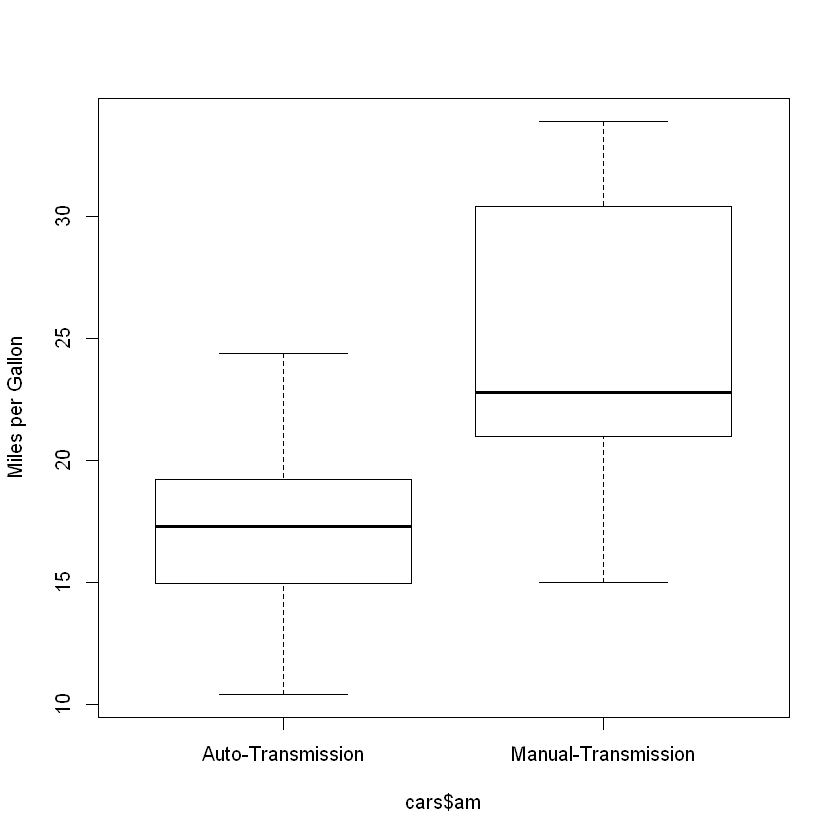

In [32]:
boxplot(cars$mpg~cars$am, ylab = "Miles per Gallon")

lets subset these levels of transmission into different variables

In [33]:
Automatic <- cars[cars$am == "Auto-Transmission",] 
Manual <- cars[cars$am == "Manual-Transmission",]

identify which category of cars i.e. auto or manual transmission have low median mileages

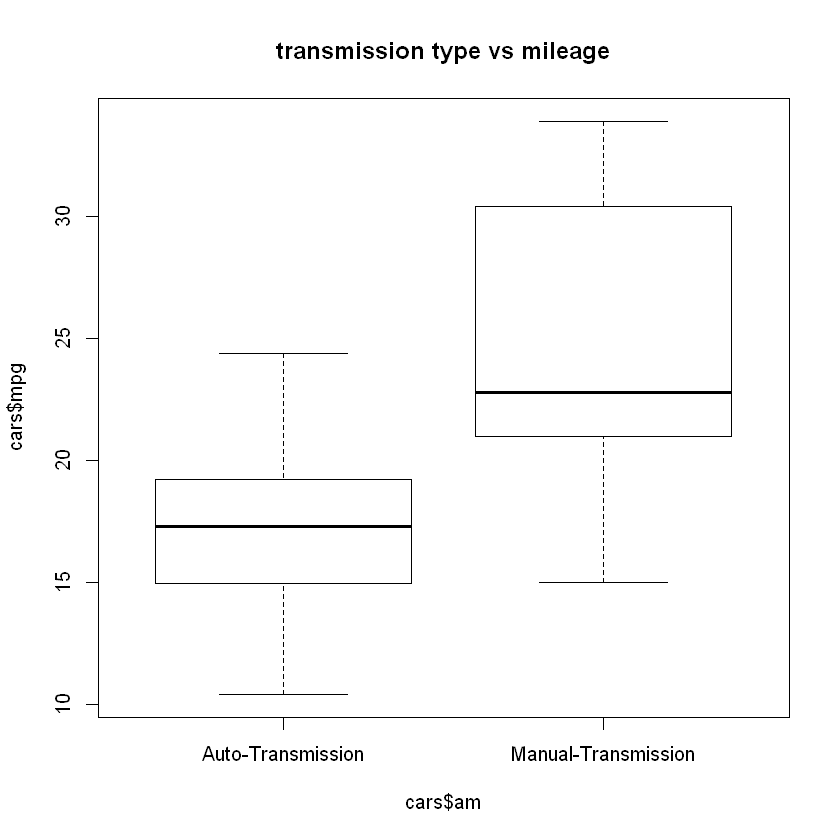

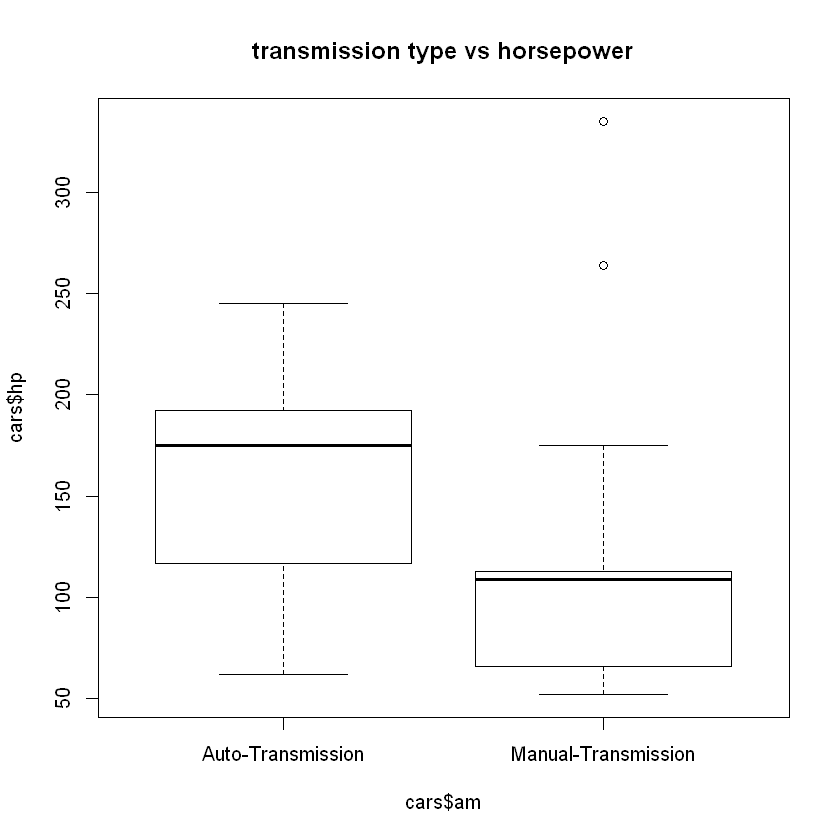

In [34]:
boxplot(cars$mpg~cars$am, main="transmission type vs mileage")
boxplot(cars$hp~cars$am, main = "transmission type vs horsepower")

#### Developing a model with single independent and a dependent variable

In [35]:
lm_single <- lm(mpg~wt, data=cars)
summary(lm_single) 


Call:
lm(formula = mpg ~ wt, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


# Developing a multiple linear regression model

In [36]:
lm_multiple <- lm(mpg~wt+hp+cyl+disp, data=cars)
summary(lm_multiple)


Call:
lm(formula = mpg ~ wt + hp + cyl + disp, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0562 -1.4636 -0.4281  1.2854  5.8269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.82854    2.75747  14.807 1.76e-14 ***
wt          -3.85390    1.01547  -3.795 0.000759 ***
hp          -0.02054    0.01215  -1.691 0.102379    
cyl         -1.29332    0.65588  -1.972 0.058947 .  
disp         0.01160    0.01173   0.989 0.331386    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.513 on 27 degrees of freedom
Multiple R-squared:  0.8486,	Adjusted R-squared:  0.8262 
F-statistic: 37.84 on 4 and 27 DF,  p-value: 1.061e-10


### Scenario 2 including automatic and manual transmission classes


In [37]:
lm_multiple_2 <- lm(mpg~wt+hp+cyl+disp+am, data=cars)
summary(lm_multiple_2)


Call:
lm(formula = mpg ~ wt + hp + cyl + disp + am, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5952 -1.5864 -0.7157  1.2821  5.5725 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           38.20280    3.66910  10.412 9.08e-11 ***
wt                    -3.30262    1.13364  -2.913  0.00726 ** 
hp                    -0.02796    0.01392  -2.008  0.05510 .  
cyl                   -1.10638    0.67636  -1.636  0.11393    
disp                   0.01226    0.01171   1.047  0.30472    
amManual-Transmission  1.55649    1.44054   1.080  0.28984    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.505 on 26 degrees of freedom
Multiple R-squared:  0.8551,	Adjusted R-squared:  0.8273 
F-statistic:  30.7 on 5 and 26 DF,  p-value: 4.029e-10
